In [4]:
import json
import pandas as pd

with open('dataset/MultiHopRAG.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# In nội dung
questions = []
answers = []
question_types = []

for i in range(len(data)):
    questions.append(data[i]['query'])
    question_types.append(data[i]['question_type'])
    answers.append(data[i]['answer'])
    
# Đếm tần suất xuất hiện
counts = pd.Series(question_types).value_counts()

print(counts)

comparison_query    856
inference_query     816
temporal_query      583
null_query          301
Name: count, dtype: int64


In [5]:
evidence_length = [len(d['evidence_list']) for d in data]
pd.Series(evidence_length).value_counts()

2    1079
3     778
4     398
0     301
Name: count, dtype: int64

In [3]:
data[0]

{'query': 'Who is the individual associated with the cryptocurrency industry facing a criminal trial on fraud and conspiracy charges, as reported by both The Verge and TechCrunch, and is accused by prosecutors of committing fraud for personal gain?',
 'answer': 'Sam Bankman-Fried',
 'question_type': 'inference_query',
 'evidence_list': [{'title': 'The FTX trial is bigger than Sam Bankman-Fried',
   'author': 'Elizabeth Lopatto',
   'url': 'https://www.theverge.com/2023/9/28/23893269/ftx-sam-bankman-fried-trial-evidence-crypto',
   'source': 'The Verge',
   'category': 'technology',
   'published_at': '2023-09-28T12:00:00+00:00',
   'fact': 'Before his fall, Bankman-Fried made himself out to be the Good Boy of crypto — the trustworthy face of a sometimes-shady industry.'},
  {'title': 'SBF’s trial starts soon, but how did he — and FTX — get here?',
   'author': 'Jacquelyn Melinek',
   'url': 'https://techcrunch.com/2023/10/01/ftx-lawsuit-timeline/',
   'source': 'TechCrunch',
   'catego

(array([  1.,   0.,   0.,  66., 167., 117.,  58.,  44.,  37.,  28.,  18.,
         14.,   9.,   4.,   6.,   7.,   9.,   5.,   2.,   1.,   0.,   1.,
          3.,   1.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([    0.  ,  1422.08,  2844.16,  4266.24,  5688.32,  7110.4 ,
         8532.48,  9954.56, 11376.64, 12798.72, 14220.8 , 15642.88,
        17064.96, 18487.04, 19909.12, 21331.2 , 22753.28, 24175.36,
        25597.44, 27019.52, 28441.6 , 29863.68, 31285.76, 32707.84,
        34129.92, 35552.  , 36974.08, 38396.16, 39818.24, 41240.32,
        42662.4 , 44084.48, 45506.56, 46928.64, 48350.72, 49772.8 ,
        51194.88, 52616.96, 54039.04, 55461.12, 56883.2 , 58305.28,
        59727.36, 61149.44, 62571.52, 63993.6 , 65415.68, 66837.76,
        68259.84, 69681.92, 71104.  ]),
 <BarContainer object of 50 artists>)

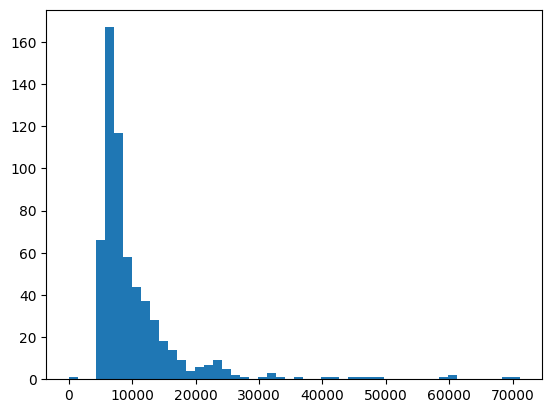

In [16]:
import matplotlib.pyplot as plt
with open('dataset/multihoprag_corpus.txt', "r", encoding="utf-8") as f:
    corpus = f.read()
docs = corpus.split('Title:')
lengths = [len(doc) for doc in docs]
plt.hist(x=lengths, bins=50)